## Pareto Distribution Simulation on a coin flipping game

The top percentage gets most of the money, production, and whatsoever. This is refered as Matthew's principle, 80-20 rule, or Pareto Distribution.

Learning that just in a pure random game with each player initialized with identical state, but as the game continues, some players would take it all and some go busted ---- Pareto distribution emerges, curiously, I wrote a script to mimic this game.

Example as rules:
say 50 players enter the game, each with 100 coins in their pocket. And their will start to gamble with each other randomly with half probability win/lose a coin to the other player. Then repeat the process.

In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
'''
attribute
    id : unique identifier
    has : number of coin the player has
method
    compete : do a coin exchange game with another player, return false if 
        game cretion does not meet
'''

class Player:
    def __init__(self, identifier, has, verbose):
        self.identifier = identifier
        self.has = has
        self.verbose = verbose
        
    def compete(self, a_player):
        if (self.has <= 0 or a_player.has <= 0):
            if verbose >= 1:
                print('one player has nothing left! No game. Players: ',self.identifier, ' and ', a_player.identifier)
            return False
        self.do_compete(a_player)
        return True
    
    def do_compete(self, a_player): ## both player has at least 1 coin is checked by compete
        p = self.get_probability(a_player)
        rn = np.random.uniform(0,p,1)
        if rn<p:
            self.has += 1
            a_player.has -= 1
        else:
            self.has -= 1
            a_player.has += 1
        
    def get_probability(self,a_player): ## extend the prob by attribute of both player
        return 0.5  ## natively we use half
    
'''
param: 
    init_n_players : number of players in the game
    init_has : each player's initial number of coins

return : 
    the player list, id is the index
'''
def init_game(init_n_players, init_has, verbose): 
    players = []
    for i in range(0,init_n_players):
        players.append(Player(i, init_has, verbose))
    return players

'''
params
    players : the player list
    epoch :   number of iterations for the game
'''
def start(players, epoch, inter_result):
    n_players = len(players)
    print("start state")
    plot_stat(players)
    for i in range(0,epoch):
        if inter_result and (i+1)%1500 == 0:
            plot_stat(players)
        
        indice = np.random.choice(n_players, 2, replace=False)
        player_1 = players[indice[0]]
        player_2 = players[indice[1]]
        player_1.compete(player_2)
        
    print("ending")
    plot_stat(players)
    
def plot_stat(players):
    coins = []
    for player in players:
        coins.append(player.has)
    plt.figure(figsize=((15,10)))
    plt.bar(np.arange(len(coins)),coins, width=0.8)
    plt.xlabel('players')
    plt.ylabel('coins')

In [127]:
epoch = 100000
init_n_players = 50
init_has = 100
verbose = 0
inter_result = False ## turn True to see some intermediate distribution plot

start state
ending


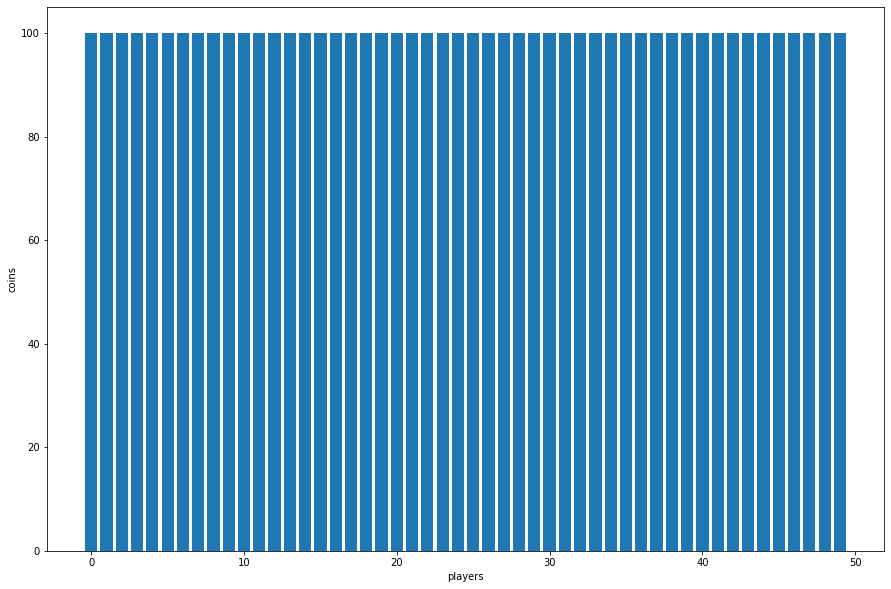

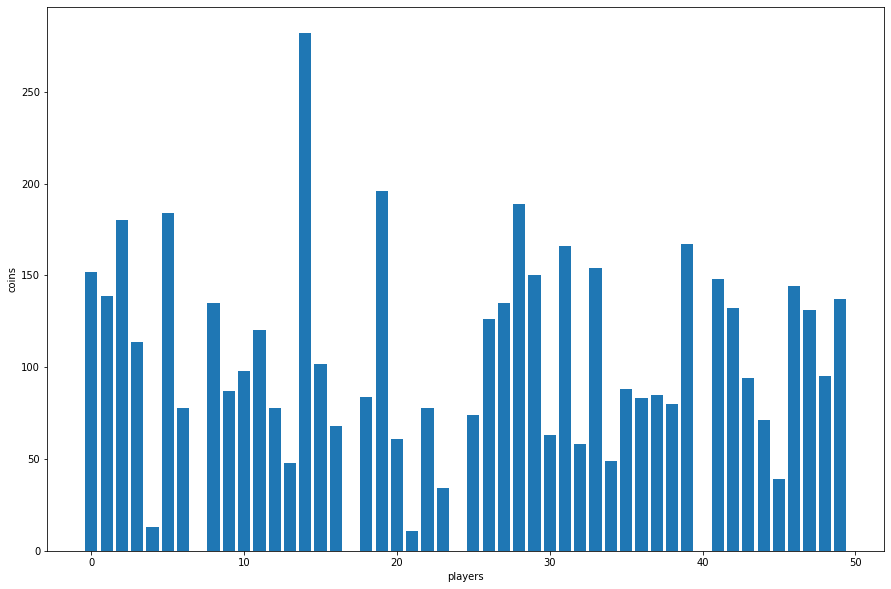

In [128]:
players = init_game(init_n_players, init_has, verbose)
start(players, epoch, inter_result)